In [2]:
!pip install pandas matplotlib statsmodels seasonal
from statsmodels.tsa.seasonal import seasonal_decompose

In [14]:
#q1-1

import pandas as pd

file_path = "../data/practice4-1/AirPassengers24.csv"
data = pd.read_csv(file_path)

# データの中身を確認
print(data.head(13))

         Month  Passengers
0   1949-01-01         112
1   1949-02-01         118
2   1949-03-01         132
3   1949-04-01         129
4   1949-05-01         121
5   1949-06-01         135
6   1949-07-01         148
7   1949-08-01         148
8   1949-09-01         136
9   1949-10-01         119
10  1949-11-01         104
11  1949-12-01         118
12  1950-01-01         115


In [16]:
print(data.tail(5))

          Month  Passengers
139  1960-08-01         606
140  1960-09-01         508
141  1960-10-01         461
142  1960-11-01         390
143  1960-12-01         432


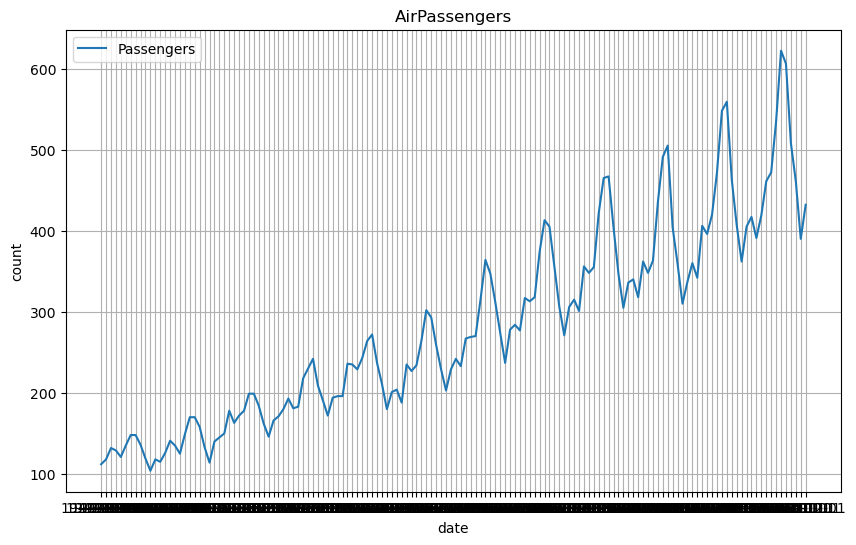

In [7]:
import matplotlib.pyplot as plt

# 折れ線グラフを描画
plt.figure(figsize=(10, 6))
for column in data.columns[1:]:  # 1列目以降のデータをプロット
    plt.plot(data[data.columns[0]], data[column], label=column)

# グラフの設定
plt.title("AirPassengers")
plt.xlabel("date")  # X軸ラベル
plt.ylabel("count")  # Y軸ラベル
plt.legend()  # 凡例
plt.grid(True)  # グリッド

# 5. グラフを表示
plt.show()

In [8]:
#q1-2
#グラフデータの準備

import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import STL
import matplotlib.pyplot as plt

file_path = "../data/practice4-1/AirPassengers24.csv"
data = pd.read_csv(file_path)

# 加法モデルの分解
additive_result = seasonal_decompose(data['Passengers'], model='additive', period=12)

# 乗法モデルの分解
multiplicative_result = seasonal_decompose(data['Passengers'], model='multiplicative', period=12)

# STL分解
stl = STL(data['Passengers'], period=12, robust=True)
stl_result = stl.fit()

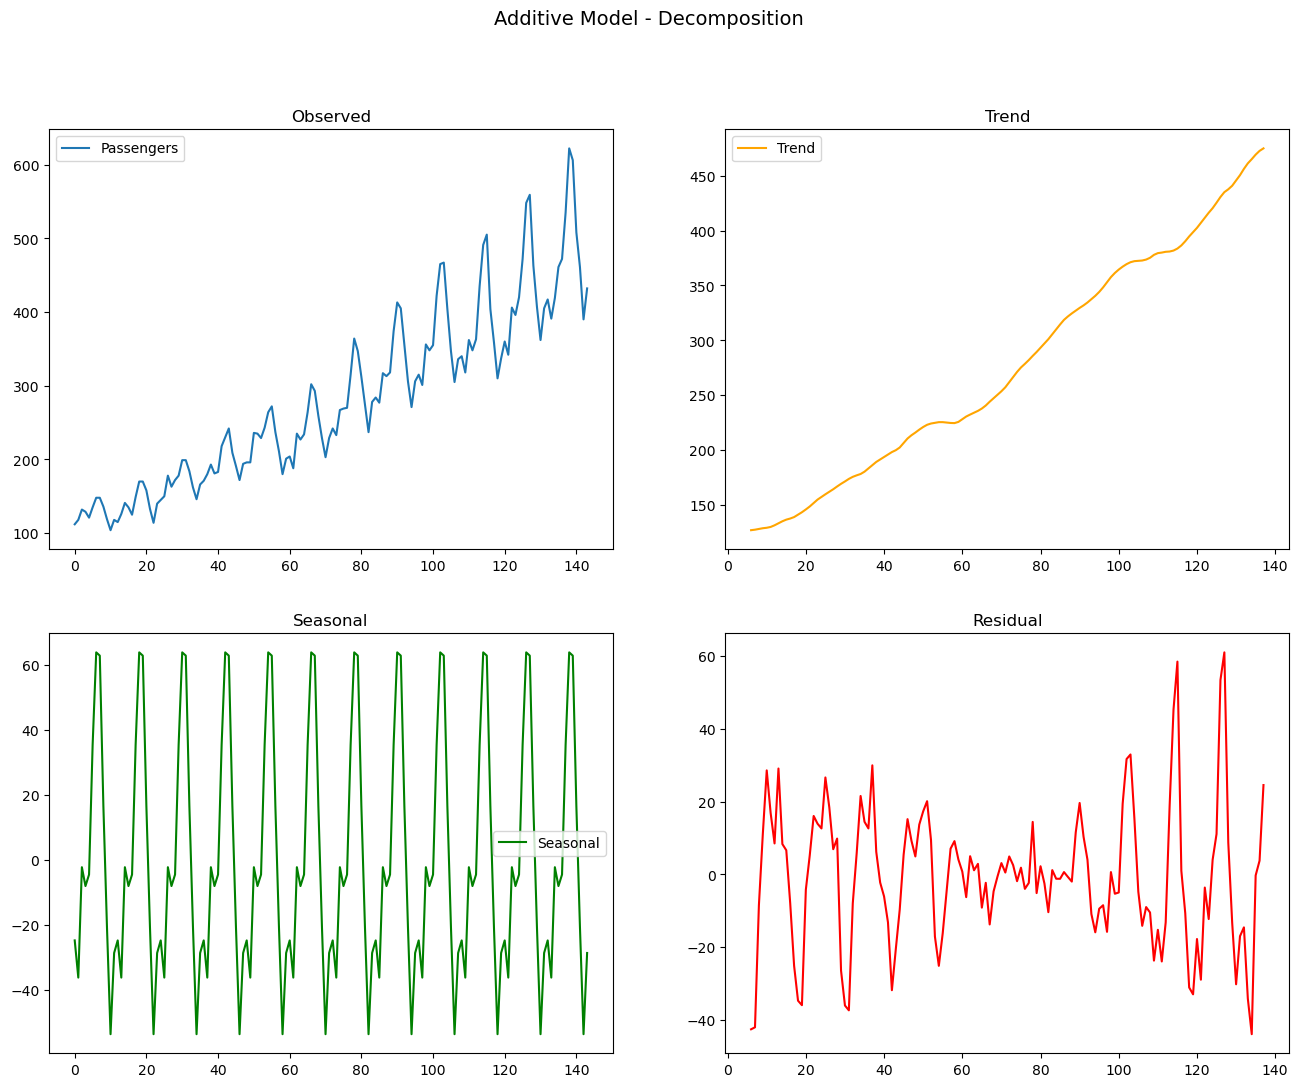

In [6]:
#加法モデル

plt.figure(figsize=(16, 12))

# 各コンポーネントを個別にプロット
plt.subplot(2, 2, 1)
plt.plot(additive_result.observed, label='Passengers')
plt.title('Observed')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(additive_result.trend, label='Trend', color='orange')
plt.title('Trend')
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(additive_result.seasonal, label='Seasonal', color='green')
plt.title('Seasonal')
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(additive_result.resid, label='Residual', color='red')
plt.title('Residual')

plt.suptitle('Additive Model - Decomposition', fontsize=14)

plt.show()

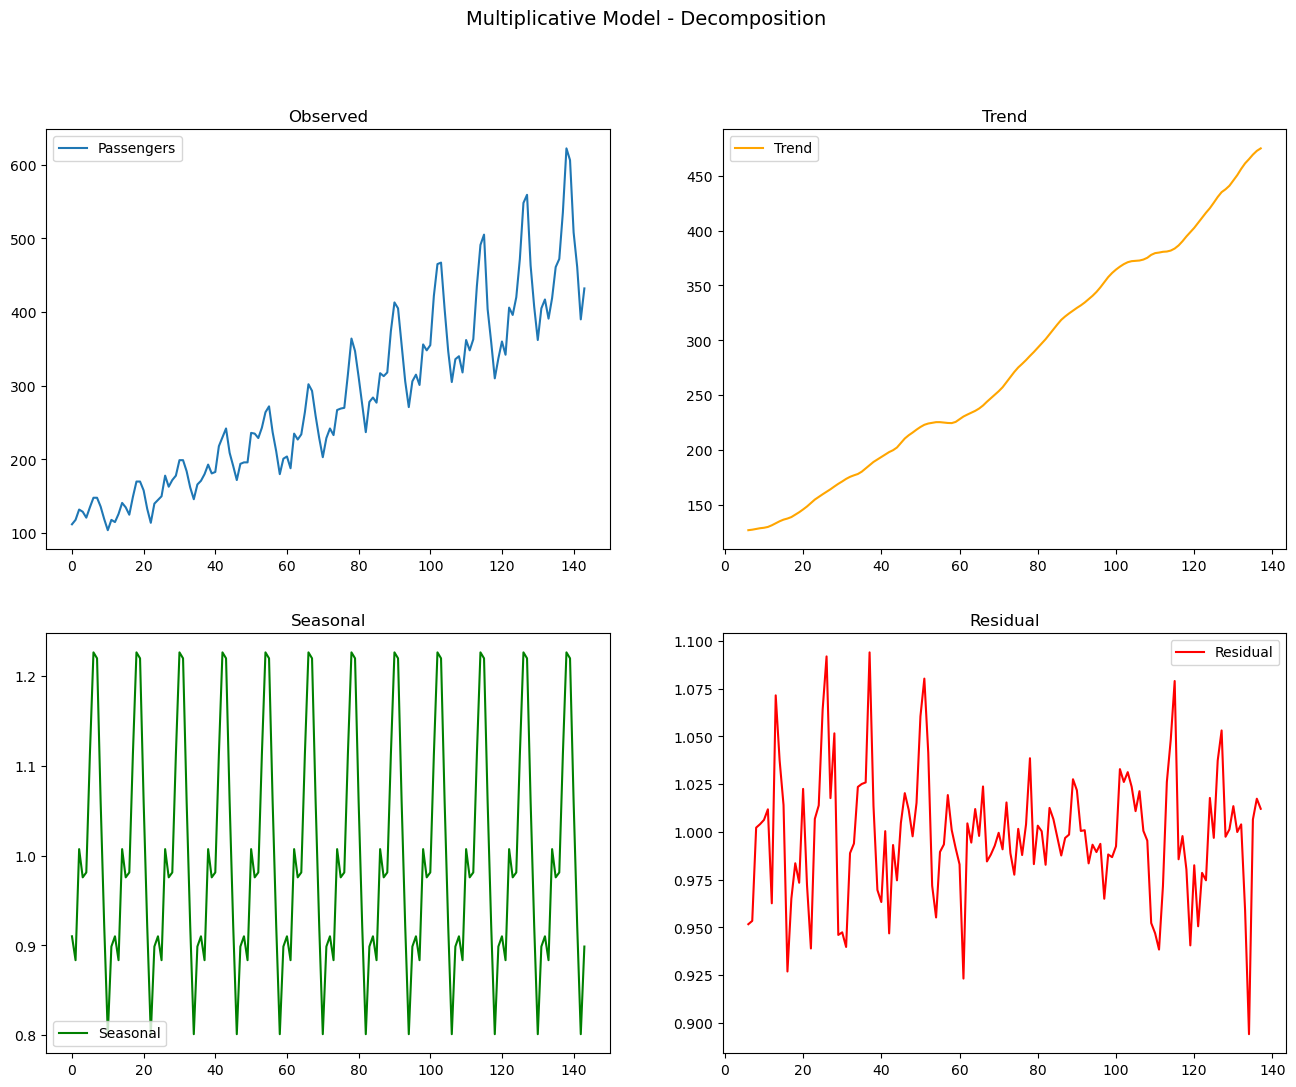

In [39]:
# 乗法モデル

plt.figure(figsize=(16, 12))

# 各コンポーネントを個別にプロット
plt.subplot(2, 2, 1)
plt.plot(multiplicative_result.observed, label='Passengers')
plt.title('Observed')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(multiplicative_result.trend, label='Trend', color='orange')
plt.title('Trend')
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(multiplicative_result.seasonal, label='Seasonal', color='green')
plt.title('Seasonal')
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(multiplicative_result.resid, label='Residual', color='red')
plt.title('Residual')
plt.legend()

plt.suptitle('Multiplicative Model - Decomposition', fontsize=14)

plt.show()

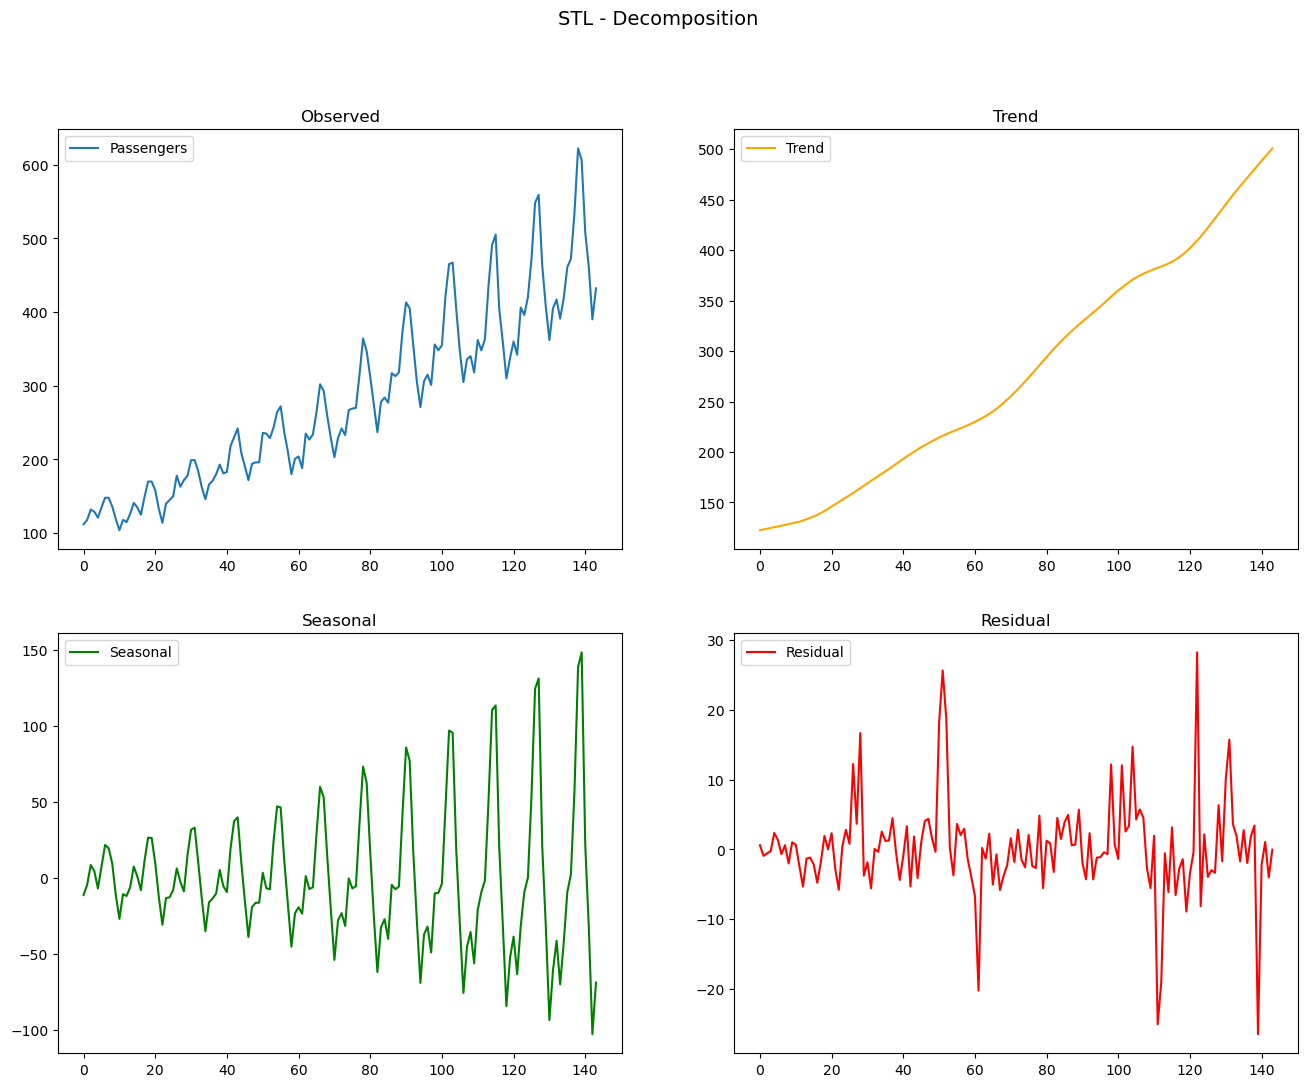

In [7]:
# STL分解
plt.figure(figsize=(16, 12))

# 各コンポーネントを個別にプロット
plt.subplot(2, 2, 1)
plt.plot(stl_result.observed, label='Passengers')
plt.title('Observed')
plt.legend()

plt.subplot(2, 2, 2)
plt.plot(stl_result.trend, label='Trend', color='orange')
plt.title('Trend')
plt.legend()

plt.subplot(2, 2, 3)
plt.plot(stl_result.seasonal, label='Seasonal', color='green')
plt.title('Seasonal')
plt.legend()

plt.subplot(2, 2, 4)
plt.plot(stl_result.resid, label='Residual', color='red')
plt.title('Residual')
plt.legend()

plt.suptitle('STL - Decomposition', fontsize=14)

plt.show()

In [10]:
# q1-3
# データ準備

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

file_path = "../data/practice4-1/AirPassengers24.csv"
data = pd.read_csv(file_path)
original_series = data['Passengers']

# 1ヶ月差分系列
diff_1 = original_series.diff(1)

# 12ヶ月差分系列
diff_12 = original_series.diff(12)

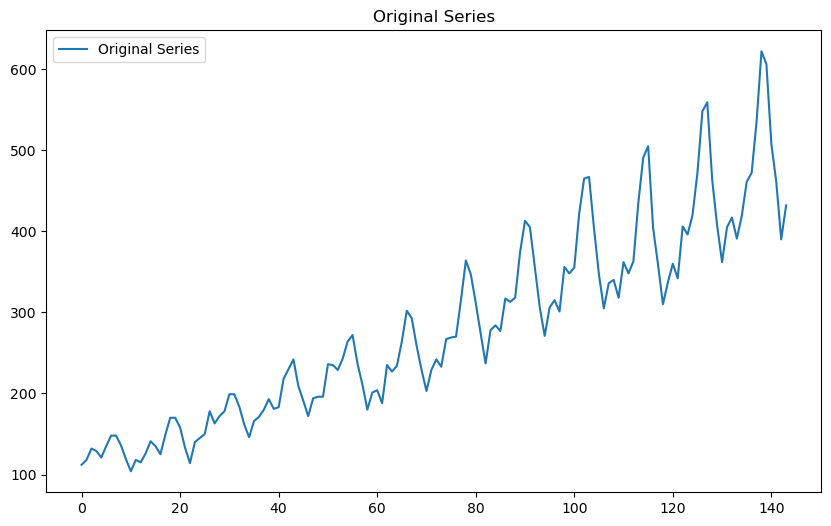

In [13]:
# グラフプロット

plt.figure(figsize=(10, 6))

# 原系列
plt.plot(original_series, label='Original Series')
plt.title('Original Series')
plt.legend()

plt.show()

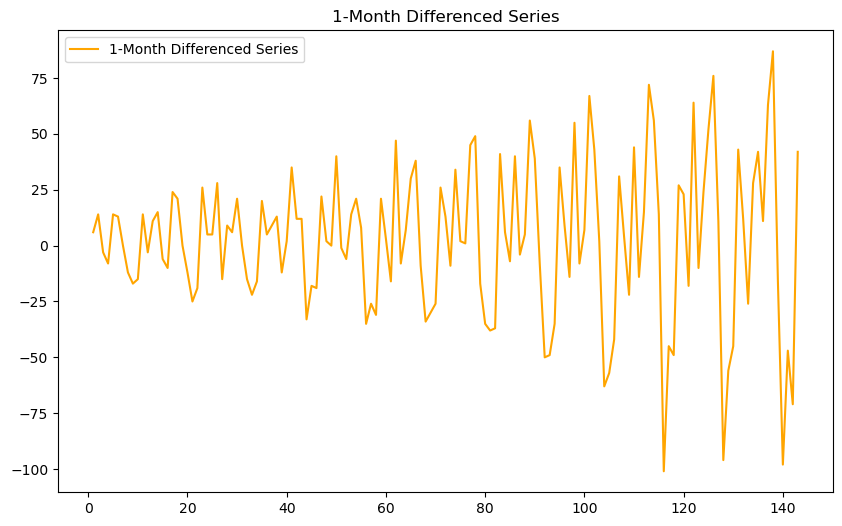

In [14]:
# 1ヶ月差分系列

plt.figure(figsize=(10, 6))
plt.plot(diff_1, label='1-Month Differenced Series', color='orange')
plt.title('1-Month Differenced Series')
plt.legend()

plt.show()

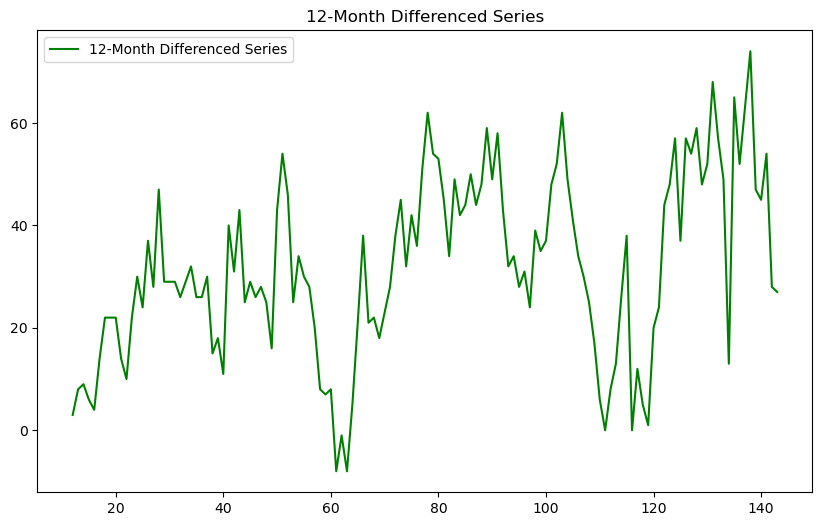

In [15]:
# 12ヶ月差分系列

plt.figure(figsize=(10, 6))
plt.plot(diff_12, label='12-Month Differenced Series', color='green')
plt.title('12-Month Differenced Series')
plt.legend()

plt.show()

In [19]:
# ADF検定

# ADF検定の結果を表示する関数
def adf_test(series, series_name):
    result = adfuller(series.dropna())
    print(f"  Test Statistic: {result[0]}")
    print(f"  p-value: {result[1]}")
    print(f"  Critical Values: {result[4]}")
    print("\n")

# 原系列のADF検定
adf_test(original_series, "Original Series")

# 1ヶ月差分系列のADF検定
adf_test(diff_1, "1-Month Differenced Series")

# 12ヶ月差分系列のADF検定
adf_test(diff_12, "12-Month Differenced Series")

  Test Statistic: 0.8153688792060528
  p-value: 0.9918802434376411
  Critical Values: {'1%': np.float64(-3.4816817173418295), '5%': np.float64(-2.8840418343195267), '10%': np.float64(-2.578770059171598)}


  Test Statistic: -2.829266824169999
  p-value: 0.05421329028382552
  Critical Values: {'1%': np.float64(-3.4816817173418295), '5%': np.float64(-2.8840418343195267), '10%': np.float64(-2.578770059171598)}


  Test Statistic: -3.383020726492481
  p-value: 0.011551493085514952
  Critical Values: {'1%': np.float64(-3.4816817173418295), '5%': np.float64(-2.8840418343195267), '10%': np.float64(-2.578770059171598)}




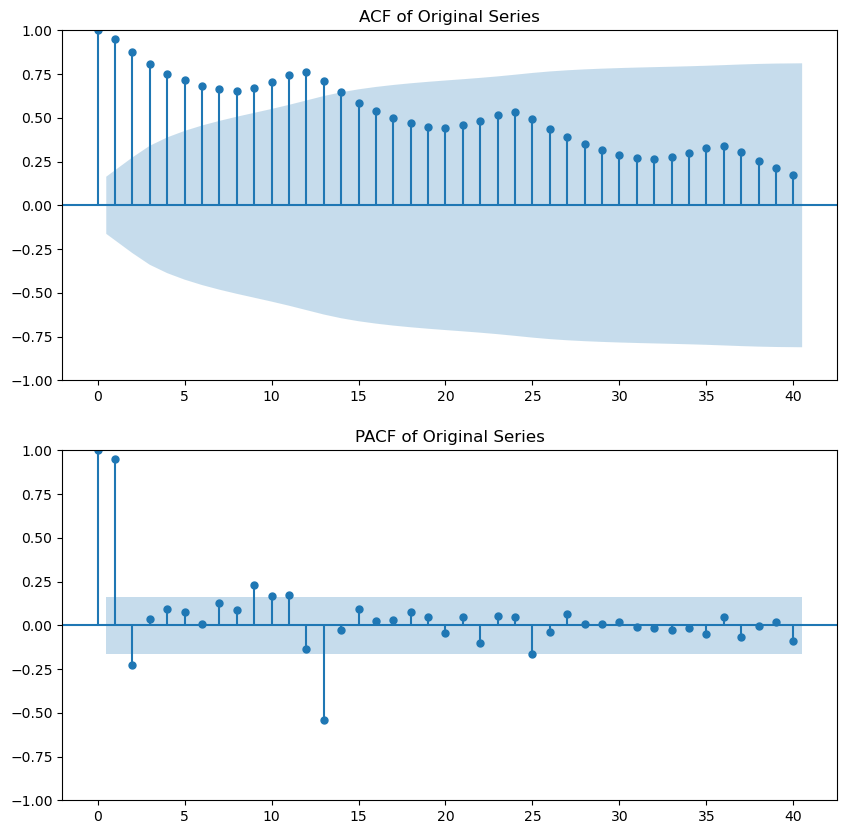

In [23]:
# q1-4

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

plt.figure(figsize=(10, 10))

# 原系列の自己相関(ACF)、偏自己相関(PACF)
plt.subplot(2, 1, 1)
plot_acf(original_series.dropna(), lags=40, ax=plt.gca())
plt.title('ACF of Original Series')

plt.subplot(2, 1, 2)
plot_pacf(original_series.dropna(), lags=40, ax=plt.gca(), method='ywm')
plt.title('PACF of Original Series')

plt.show()

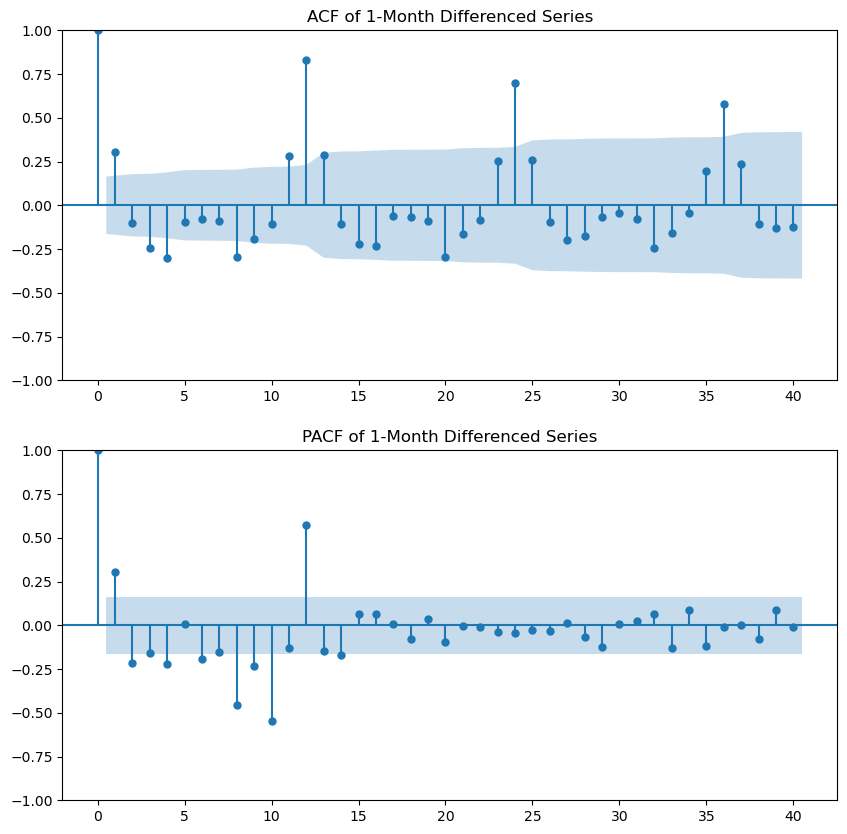

In [25]:
plt.figure(figsize=(10, 10))

# 1ヶ月差分系列の自己相関(ACF)、偏自己相関(PACF)
plt.subplot(2, 1, 1)
plot_acf(diff_1.dropna(), lags=40, ax=plt.gca())
plt.title('ACF of 1-Month Differenced Series')

plt.subplot(2, 1, 2)
plot_pacf(diff_1.dropna(), lags=40, ax=plt.gca(), method='ywm')
plt.title('PACF of 1-Month Differenced Series')

plt.show()

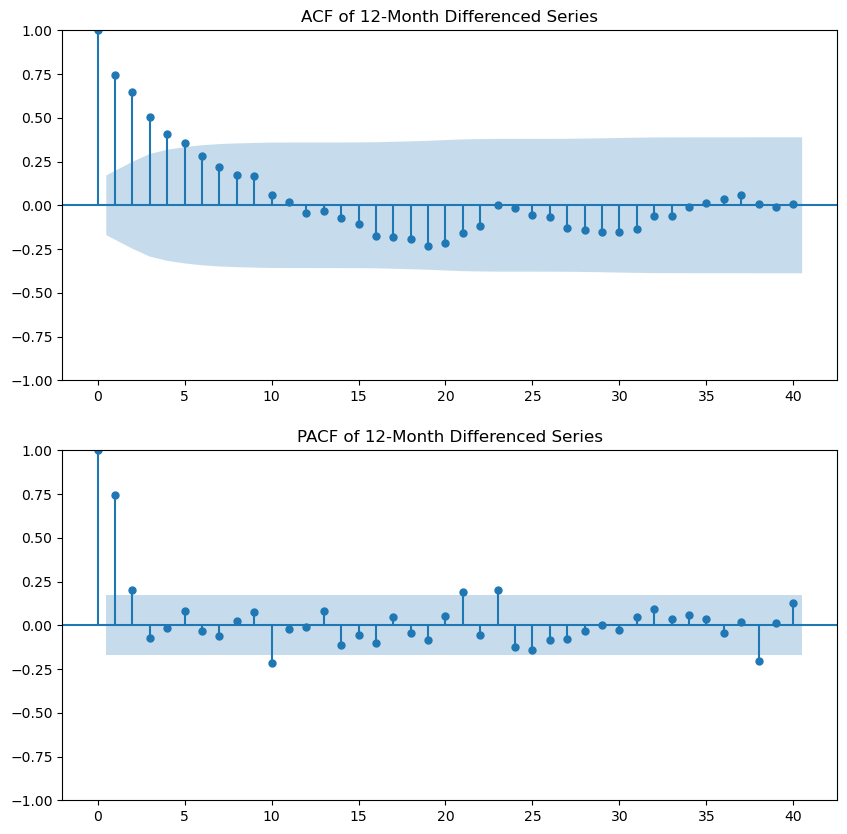

In [27]:
plt.figure(figsize=(10, 10))

# 12ヶ月差分系列の自己相関(ACF)、偏自己相関(PACF)
plt.subplot(2, 1, 1)
plot_acf(diff_12.dropna(), lags=40, ax=plt.gca())
plt.title('ACF of 12-Month Differenced Series')

plt.subplot(2, 1, 2)
plot_pacf(diff_12.dropna(), lags=40, ax=plt.gca(), method='ywm')
plt.title('PACF of 12-Month Differenced Series')

plt.show()

In [28]:
# q1-5

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

file_path = "../data/practice4-1/AirPassengers24.csv"
data = pd.read_csv(file_path)

# データセットの分割
test_size = 12  # 直近12ヶ月
train = data.iloc[:-test_size]  # テストデータ以外をトレーニングデータ
test = data.iloc[-test_size:]  # 直近12ヶ月をテストデータ

In [31]:
print(test.head())

          Month  Passengers
132  1960-01-01         417
133  1960-02-01         391
134  1960-03-01         419
135  1960-04-01         461
136  1960-05-01         472


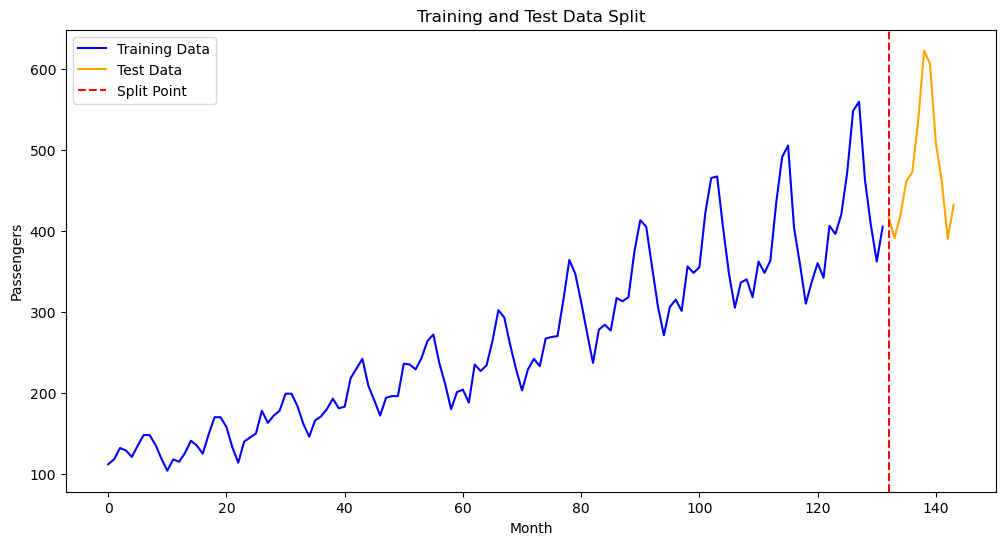

In [32]:
# グラフの描画
plt.figure(figsize=(12, 6))

# トレーニングデータ
plt.plot(train.index, train['Passengers'], label='Training Data', color='blue')

# テストデータ
plt.plot(test.index, test['Passengers'], label='Test Data', color='orange')

# 分割点の強調
plt.axvline(test.index[0], color='red', linestyle='--', label='Split Point')

# ラベル設定
plt.title('Training and Test Data Split')
plt.xlabel('Month')
plt.ylabel('Passengers')
plt.legend()
plt.show()

                               SARIMAX Results                                
Dep. Variable:             Passengers   No. Observations:                  132
Model:                 ARIMA(1, 1, 1)   Log Likelihood                -625.518
Date:                Thu, 26 Dec 2024   AIC                           1257.035
Time:                        13:46:05   BIC                           1265.661
Sample:                             0   HQIC                          1260.540
                                - 132                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.5436      0.100     -5.443      0.000      -0.739      -0.348
ma.L1          0.9272      0.051     18.336      0.000       0.828       1.026
sigma2       816.5398     95.147      8.582      0.0

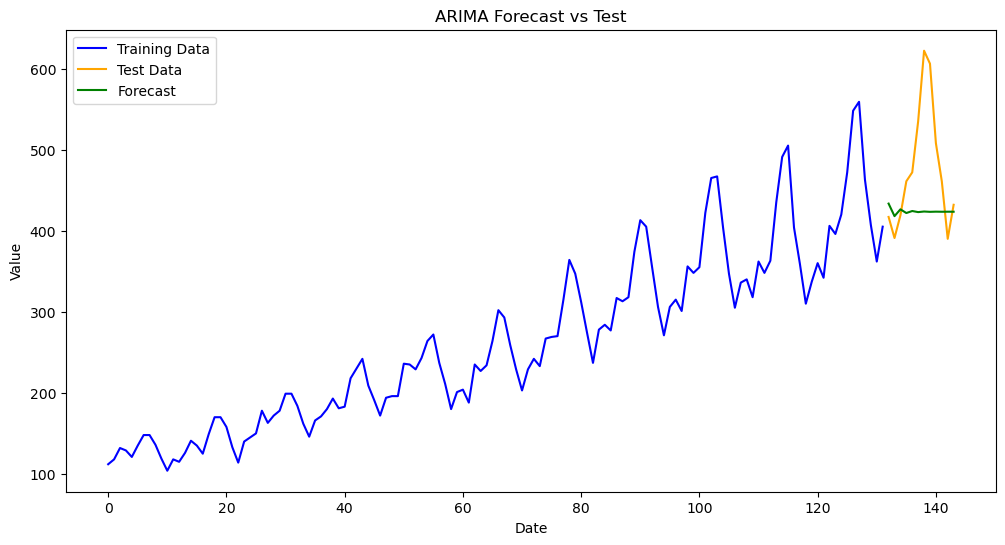

Mean Squared Error (MSE): 8322.701142626915


In [34]:
#q1-6

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

# パラメータ設定 (例: p=1, d=1, q=1)
p, d, q = 1, 1, 1

# ARIMAモデルの学習
model = ARIMA(train['Passengers'], order=(p, d, q))
fitted_model = model.fit()

# モデルの概要出力
print(fitted_model.summary())

# テストデータ期間の予測
forecast = fitted_model.forecast(steps=test_size)

plt.figure(figsize=(12, 6))

# トレーニングデータ
plt.plot(train.index, train['Passengers'], label='Training Data', color='blue')

# テストデータ（実測値）
plt.plot(test.index, test['Passengers'], label='Test Data', color='orange')

# 予測値
plt.plot(test.index, forecast, label='Forecast', color='green')

# ラベル設定
plt.title('ARIMA Forecast vs Test')
plt.xlabel('Date')
plt.ylabel('Value')
plt.legend()
plt.show()

# 平均二乗誤差 (MSE)
mse = mean_squared_error(test['Passengers'], forecast)
print(f"Mean Squared Error (MSE): {mse}")

In [36]:
# q1-7

import numpy as np
from sklearn.metrics import mean_squared_error, mean_absolute_error

# RMSEの計算
rmse = np.sqrt(mean_squared_error(test['Passengers'], forecast))
print(f"RMSE: {rmse}")

# MAEの計算
mae = mean_absolute_error(test['Passengers'], forecast)
print(f"MAE: {mae}")

# MAPEの計算
mape = np.mean(np.abs((test['Passengers'] - forecast) / test['Passengers'])) * 100
print(f"MAPE: {mape}%")



RMSE: 91.22883942387361
MAE: 66.24167467401347
MAPE: 12.462032796976953%
